In [1]:
import tensorflow as tf
import numpy as np
import pickle
np.random.seed(7)

In [2]:
with open ('C:\\Users\\Wilfred\\Desktop\\Look-ahead-N\\input_layer_4_6_13_3.pickle','rb') as file:
    input_data = pickle.load(file)
permutation = list(np.random.permutation(input_data.shape[0]))
input_data = input_data[permutation,:]
print(input_data.shape)
x_train = input_data[:100000, :]
x_test = input_data[100000:105000, :]


(105000, 24)


In [3]:
with open ('C:\\Users\\Wilfred\\Desktop\\Look-ahead-N\\output_layer_4_6_13_3.pickle','rb') as file:
    output_data = pickle.load(file)
output_data = np.transpose(output_data)
output_data = output_data[permutation,:]
y_train = output_data[:100000, :]
y_test = output_data[100000:105000, :]
print(output_data.shape)

(105000, 12)


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(150, input_shape = [24], activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(12, activation = 'sigmoid')
])
adam = tf.keras.optimizers.Adam(lr = 0.005)
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = 1024, epochs = 150, verbose = 2, validation_data = (x_test, y_test))


Train on 100000 samples, validate on 5000 samples
Epoch 1/150
100000/100000 - 3s - loss: 0.3270 - accuracy: 0.8640 - val_loss: 0.2743 - val_accuracy: 0.8847
Epoch 2/150
100000/100000 - 2s - loss: 0.2630 - accuracy: 0.8875 - val_loss: 0.2567 - val_accuracy: 0.8893
Epoch 3/150
100000/100000 - 2s - loss: 0.2428 - accuracy: 0.8949 - val_loss: 0.2388 - val_accuracy: 0.8975
Epoch 4/150
100000/100000 - 2s - loss: 0.2228 - accuracy: 0.9046 - val_loss: 0.2170 - val_accuracy: 0.9077
Epoch 5/150
100000/100000 - 2s - loss: 0.2049 - accuracy: 0.9119 - val_loss: 0.2000 - val_accuracy: 0.9128
Epoch 6/150
100000/100000 - 2s - loss: 0.1892 - accuracy: 0.9170 - val_loss: 0.1867 - val_accuracy: 0.9169
Epoch 7/150
100000/100000 - 2s - loss: 0.1775 - accuracy: 0.9200 - val_loss: 0.1775 - val_accuracy: 0.9179
Epoch 8/150
100000/100000 - 2s - loss: 0.1684 - accuracy: 0.9229 - val_loss: 0.1720 - val_accuracy: 0.9218
Epoch 9/150
100000/100000 - 2s - loss: 0.1606 - accuracy: 0.9254 - val_loss: 0.1635 - val_accu

Epoch 77/150
100000/100000 - 2s - loss: 0.0341 - accuracy: 0.9869 - val_loss: 0.0718 - val_accuracy: 0.9761
Epoch 78/150
100000/100000 - 2s - loss: 0.0321 - accuracy: 0.9877 - val_loss: 0.0757 - val_accuracy: 0.9754
Epoch 79/150
100000/100000 - 2s - loss: 0.0320 - accuracy: 0.9878 - val_loss: 0.0745 - val_accuracy: 0.9768
Epoch 80/150
100000/100000 - 2s - loss: 0.0320 - accuracy: 0.9879 - val_loss: 0.0732 - val_accuracy: 0.9770
Epoch 81/150
100000/100000 - 2s - loss: 0.0320 - accuracy: 0.9880 - val_loss: 0.0657 - val_accuracy: 0.9785
Epoch 82/150
100000/100000 - 2s - loss: 0.0301 - accuracy: 0.9886 - val_loss: 0.0748 - val_accuracy: 0.9759
Epoch 83/150
100000/100000 - 2s - loss: 0.0319 - accuracy: 0.9879 - val_loss: 0.0682 - val_accuracy: 0.9769
Epoch 84/150
100000/100000 - 2s - loss: 0.0311 - accuracy: 0.9882 - val_loss: 0.0663 - val_accuracy: 0.9777
Epoch 85/150
100000/100000 - 2s - loss: 0.0319 - accuracy: 0.9881 - val_loss: 0.0715 - val_accuracy: 0.9771
Epoch 86/150
100000/100000 -

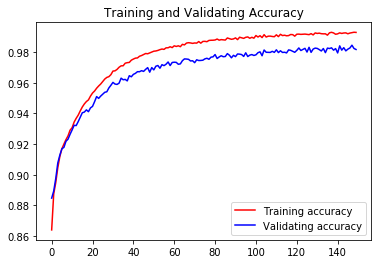

In [6]:
import matplotlib.pyplot as plt
plt.figure()
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validating accuracy')
plt.title('Training and Validating Accuracy')
#plt.title('Training Accuracy')
plt.legend()
plt.show()

In [8]:
#model.evaluate(x_test, y_test, verbose = 2)

5000/1 - 0s - loss: 0.0630 - accuracy: 0.9720


[0.04715186712741852, 0.9720002]

In [7]:
model.save('C:\\Users\\Wilfred\\Desktop\\weights\\Look_ahead_N\\Look_ahead_N_4_6_13_3_model.h5')